https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
<br>
待完成

In [1]:
from sklearn import svm
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('../machinelearninginaction-master/Ch06/testSet.txt', header=None, sep='\t', names=['X1','X2','y'])
df.head(3)

,X1,X2,y
0,3.542485,1.977398,-1
1,3.018896,2.556416,-1
2,7.551510,-1.580030,1


In [8]:
X = df[['X1','X2']]
y = df['y']

In [10]:
X = np.asarray(X)
y = np.asarray(y)

In [11]:
model = svm.SVC(kernel='linear', C=1, gamma=1)

In [12]:
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
model.score(X, y)

1.0

# Tune paramter of SVM

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, :2] # just take the first two features
y = iris.target

In [5]:
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)

In [6]:
# create a mesh to plot
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

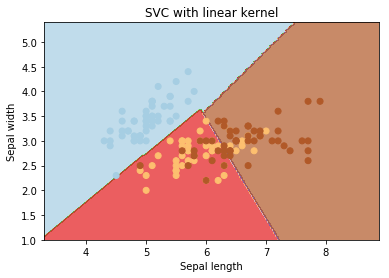

In [10]:
# plt.subplot(1,1,1)
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#### kernel

In [12]:
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

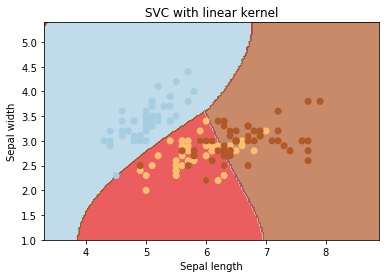

In [18]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#### The parameter gamma

In [39]:
plt.style.use('seaborn-whitegrid')

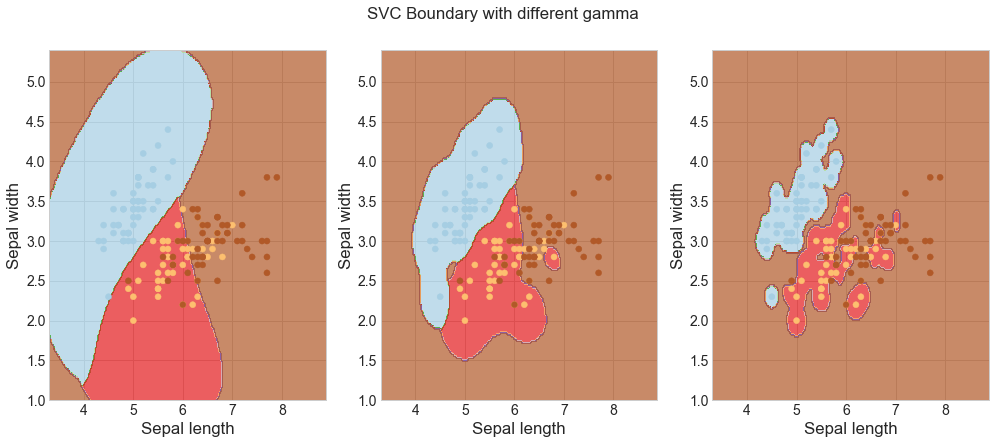

In [40]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('SVC Boundary with different gamma')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

svc1 = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
svc2 = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)
svc3 = svm.SVC(kernel='rbf', C=1,gamma=100).fit(X, y)

Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax1.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.7)
Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.7)
Z3 = svc3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax3.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.7)

for ax in fig.axes:
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xlim(xx.min(), xx.max())


#### The parameter C

In [57]:
plt.style.use('seaborn')

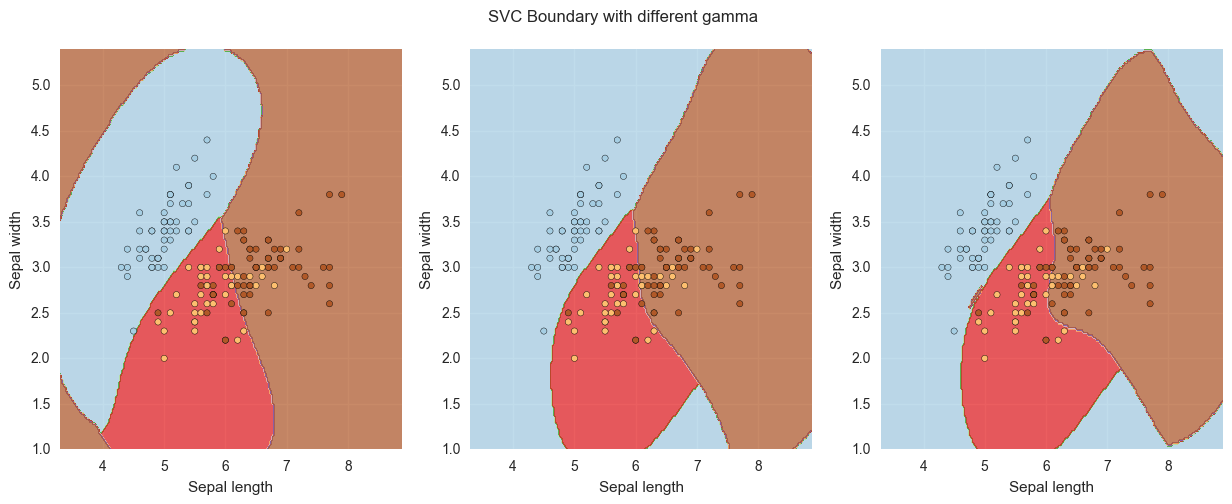

In [58]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('SVC Boundary with different gamma')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

svc1 = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
svc2 = svm.SVC(kernel='rbf', C=10,gamma=1).fit(X, y)
svc3 = svm.SVC(kernel='rbf', C=100,gamma=1).fit(X, y)

Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax1.contourf(xx, yy, Z1, cmap=plt.cm.Paired, alpha=0.7)
Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=0.7)
Z3 = svc3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax3.contourf(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.7)

for ax in fig.axes:
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xlim(xx.min(), xx.max())

In [52]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']